# MediaPipe Hands

## Opciones de configuración 

#### STATIC_IMAGE_MODE (POR DEFECTO FALSE) 
Puede tener valores de True o False. Cuando se le asigna False, entonces trata a las imágeness de entrada como un videostream, de tal manera que aplica el modelo de detección de palma y el modelo hand landmarks en un principio, pero luego realiza tracking para obtener la nueva ubicación de la mano, basándose en los puntos de referencia. De este modo, solo se invocará nuevamente al detector de palmas cuando no se hayan identificado los 21 puntos. 

Cuando se le asigna True, entonces los detectores estarán aplicádose en cada imagen, por lo que es mejor usarla en caso de que se trate de imágenes que no tengan que ver entre sí. 

####  MAX_NUM_HANDS (POR DEFECTO 2) 
Número máximo de manos por detectar. 

####  MIN_DETECTION_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de detección de manos, para que la detección sea considerada como exitosa. Sus valores comprenden de 0 a 1. 

####  MIN_TRACKING_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de rastreo de los landmark, para que el rastreo de los 21 puntos sea considerado como exitoso. En caso de no serlo, se invocará al detector de manos en la siguiente imagen. 
Este es ignorado si static_image_mode está en True. 


* https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
* https://mediapipe.readthedocs.io/en/latest/solutions/hands.html

<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/hand-landmarks.png">

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
import mediapipe as mp

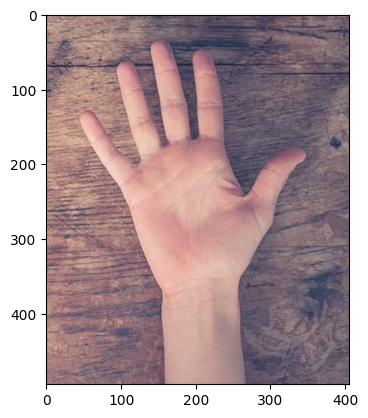

In [2]:
mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    img=cv2.imread('figuras/mano_derecha.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Información Principal [classification {
  index: 0
  score: 0.9670823
  label: "Left"
}
]


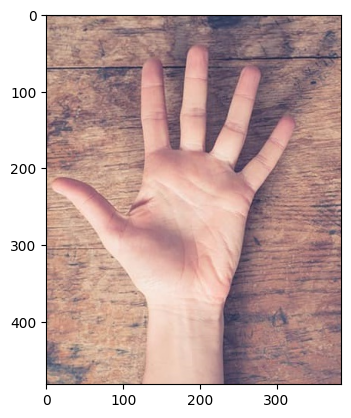

In [3]:
mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    img=cv2.imread('figuras/mano_izquierda.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.flip(img,1)
    
    results= hands.process(img)
    print('Información Principal',results.multi_handedness)
    
    plt.imshow(cv2.flip(img,1))
    plt.show()

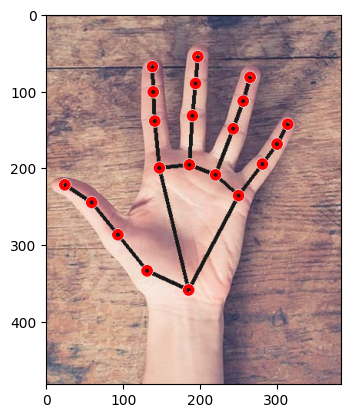

In [4]:
mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    img=cv2.imread('figuras/mano_izquierda.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.flip(img,1)
    
    results= hands.process(img)
    #print('Información Principal',results.multi_hand_landmarks)
    if results.multi_hand_landmarks:
        for hand_landmark in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img,hand_landmark, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec((255,0,0),4,5), mp_drawing.DrawingSpec((25,25,25),4))
            

    
    plt.imshow(cv2.flip(img,1))
    plt.show()

Piedra


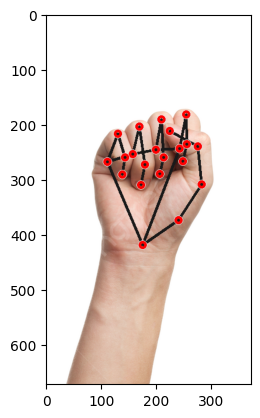

In [5]:
mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    img=cv2.imread('figuras/piedra.png')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.flip(img,1)
    
    results= hands.process(img)
    #print('Información Principal',results.multi_hand_landmarks)
    if results.multi_hand_landmarks:
        for hand_landmark in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img,hand_landmark, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec((255,0,0),4,5), mp_drawing.DrawingSpec((25,25,25),4))
            #print(hand_landmark.landmark[8].y)
            #print(hand_landmark.landmark[6].y)
            if (hand_landmark.landmark[8].y < hand_landmark.landmark[6].y):
                estado='1'
            else:
                estado='0'
            if (hand_landmark.landmark[12].y < hand_landmark.landmark[10].y):
                 estado=estado+'1'
            else:
                estado=estado+'0'
            if (hand_landmark.landmark[16].y < hand_landmark.landmark[14].y):
                 estado=estado+'1'
            else:
                estado=estado+'0'
            if (hand_landmark.landmark[20].y < hand_landmark.landmark[18].y):
                 estado=estado+'1'
            else:
                estado=estado+'0'
            
            if estado== '1111':
                print('Papel')
            elif estado=='0000':
                print('Piedra')
            elif estado=='1100':
                print('Tijera')
            else:
                print('No estas jugando')
    plt.imshow(cv2.flip(img,1))
    plt.show()